# Unit 5 - Financial Planning


In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [6]:
# Set monthly household income
# YOUR CODE HERE!
monthly_household_income = 12000.00

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [9]:
# Fetch current BTC price
# YOUR CODE HERE!

'''change to json format'''
btc_url=btc_url + "?format=json"

btc_response_data=requests.get(btc_url)


'''convert to json data'''
btc_data=btc_response_data.json()
'''test print json data to iterate to btc price value. commented out for brevity'''
# print(json.dumps(btc_data, indent=4))

'''assign btc value to variable'''
btc_price=btc_data['data']['1']['quotes']['USD']['price']
# print(btc_price)

# Fetch current ETH price
# YOUR CODE HERE!]
eth_url=eth_url+"?format=json"
eth_response_data=requests.get(eth_url)

'''convert to json data'''
eth_data=eth_response_data.json()
'''test print json data to iterate to eth price value.'''
# print(json.dumps(eth_data, indent=4))

eth_price=eth_data['data']['1027']['quotes']['USD']['price']
# print(eth_price)

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=my_btc*btc_price
my_eth_value=my_eth*eth_price

# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13667.20
The current value of your 5.3 ETH is $2055.87


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

'''test keys'''
# print(f"Alpaca Key: {type(alpaca_api_key)}")
# print(f"Alpaca Secret Key: {type(alpaca_secret_key)}")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)


In [12]:
# Format current date as ISO format
# YOUR CODE HERE!
today=pd.Timestamp('2020-08-27', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio=alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df

'''Remove System Time/Trade Close time from index'''
df_portfolio.index=df_portfolio.index.date
df_portfolio
    
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price=float(df_portfolio['AGG']['close'])
spy_close_price=float(df_portfolio['SPY']['close'])

# # Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.97
Current SPY closing price: $348.29


In [13]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17414.50
The current value of your 200 AGG shares is $23594.00


### Savings Health Analysis

In [14]:
# Create savings DataFrame
# YOUR CODE HERE!
df_savings=pd.DataFrame()
savings_crypto={
    'Amount':[(my_btc_value+my_eth_value), (my_spy_value+my_agg_value)],
}

df_savings=pd.DataFrame(savings_crypto, index=['Cryptocurrency','Investments'])
# # df_savings=df_savings.set_index(['BTC','ETH'])
# df_savings.rename(index={0: "BTC", 1: "ETH"})
# df_savings.rename({0: "BTC", 1:"ETH"}, axis='index')

# Display savings DataFrame
display(df_savings)

,Amount
Cryptocurrency,15723.066
Investments,41008.500


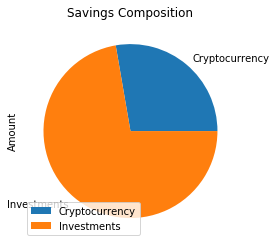

In [15]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='Amount', title="Savings Composition")

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=my_btc_value+my_eth_value+my_agg_value + my_spy_value
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f' Congratulations! Your total savings of ${total_savings} exceeds your goal!')
elif total_savings == emergency_fund:
    print (f' Congratulations! Your total savings of ${total_savings} meets your goal!')
else:
    print(f' You still need ${(emergency_fund-total_savings)} to reach your goal!')

 Congratulations! Your total savings of $56731.566 exceeds your goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
'''Using code learned in class'''
end_date=pd.Timestamp.now(tz='America/New_York')
start_date=(end_date-pd.DateOffset(years=5)).isoformat()

# start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
# end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data=alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_stock_data.index=df_stock_data.index.date
df_stock_data.head()

AGG                                           SPY           \
              open    high       low    close     volume    open     high   
2015-08-28  109.34  109.37  108.9300  109.001  4604866.0  198.50  199.835   
2015-08-31  109.28  109.37  108.9000  108.920  3866305.0  198.11  199.125   
2015-09-01  108.83  109.11  108.7700  109.010  3083045.0  193.12  194.770   
2015-09-02  108.92  109.05  108.8100  108.900  3273302.0  194.65  195.460   
2015-09-03  109.06  109.12  108.8701  109.040  1676171.0  196.26  198.050   

                                       
               low   close     volume  
2015-08-28  197.92  199.28  111959716  
2015-08-31  197.01  197.60  108023599  
2015-09-01  190.73  191.61  173963880  
2015-09-02  192.42  195.46  120044919  
2015-09-03  194.96  195.55  117191452

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_dist=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)

In [20]:
# Printing the simulation input data
# YOUR CODE HERE!
mc_dist.portfolio_data.head()

AGG                                                        SPY  \
              open    high       low    close     volume daily_return    open   
2015-08-28  109.34  109.37  108.9300  109.001  4604866.0          NaN  198.50   
2015-08-31  109.28  109.37  108.9000  108.920  3866305.0    -0.000743  198.11   
2015-09-01  108.83  109.11  108.7700  109.010  3083045.0     0.000826  193.12   
2015-09-02  108.92  109.05  108.8100  108.900  3273302.0    -0.001009  194.65   
2015-09-03  109.06  109.12  108.8701  109.040  1676171.0     0.001286  196.26   

                                                             
               high     low   close     volume daily_return  
2015-08-28  199.835  197.92  199.28  111959716          NaN  
2015-08-31  199.125  197.01  197.60  108023599    -0.008430  
2015-09-01  194.770  190.73  191.61  173963880    -0.030314  
2015-09-02  195.460  192.42  195.46  120044919     0.020093  
2015-09-03  198.050  194.96  195.55  117191452     0.000460

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997577,1.006603,0.993826,1.010460,1.002463,1.003905,0.997698,0.992237,1.003471,0.996874,...,1.002227,1.004489,0.996898,0.990166,0.992991,1.008607,0.981327,1.001725,1.010789,0.998687
2,0.991469,1.004542,0.994283,1.014792,1.009827,1.002110,0.997937,0.987296,1.016200,1.010231,...,1.010557,1.006329,0.989524,0.991682,1.004257,1.008719,0.975751,1.007095,1.007114,0.997076
3,1.002598,1.000379,0.986946,1.007700,1.002940,1.015890,0.998692,0.983741,1.010811,1.003553,...,1.011850,1.007685,0.994773,1.010966,0.993201,1.005787,0.966304,1.018489,1.010861,1.007164
4,1.000712,0.997108,0.994096,1.005595,1.011077,1.036354,0.995267,0.974846,1.011546,1.003971,...,1.018950,1.020993,0.995210,1.016450,1.002696,0.998977,0.965466,1.016571,1.010507,1.001735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.077273,15.376430,21.567030,14.410621,16.735452,12.866912,10.853173,12.528358,15.150293,8.440682,...,4.666052,18.704923,6.672306,10.646384,15.558043,8.881074,6.377810,6.707968,7.602067,13.518612
7557,8.115259,15.442960,21.497907,14.392308,16.733453,12.764508,10.920213,12.552681,14.873394,8.432941,...,4.689492,18.573326,6.654444,10.658305,15.499054,8.853757,6.385358,6.712217,7.539980,13.517238
7558,8.132708,15.460712,21.723045,14.548297,16.944464,12.828953,10.821255,12.461827,14.771447,8.414519,...,4.713916,18.532088,6.590992,10.872304,15.535360,8.862817,6.396313,6.714751,7.597679,13.586925
7559,8.128137,15.537226,21.640402,14.651887,16.898800,12.978390,10.760052,12.383596,14.824184,8.419034,...,4.726152,18.583658,6.609000,10.956122,15.495332,8.702487,6.342250,6.788240,7.552177,13.445494


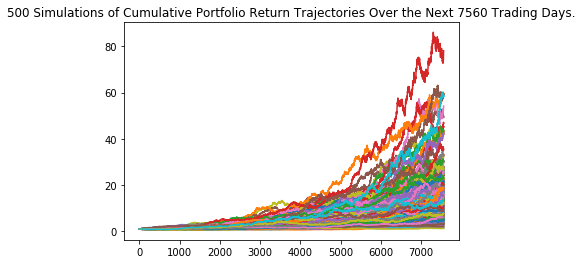

In [22]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_dist_lines_plot=mc_dist.plot_simulation()

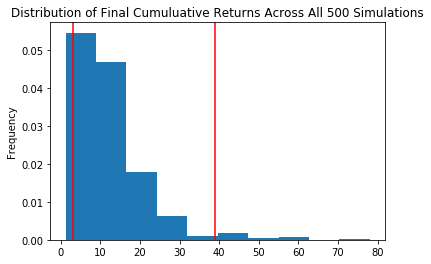

In [23]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot= mc_dist.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl=mc_dist.summarize_cumulative_return()
# Print summary statistics
print(even_tbl)

count           500.000000
mean             12.584185
std               9.162566
min               1.224878
25%               6.760282
50%              10.002284
75%              15.584635
max              78.065628
95% CI Lower      3.139801
95% CI Upper     38.834567
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [25]:
# Set initial investment
initial_investment = 20000

ci_upper=round(even_tbl[9]*initial_investment,2)
ci_lower=round(even_tbl[8]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $62796.02 and $776691.34


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_upper_increased=round(even_tbl[9]*initial_investment,2)
ci_lower_increased=round(even_tbl[8]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_increased} and ${ci_upper_increased}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $94194.04 and $1165037.01


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

mc_dist_5=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.5,.95],
    num_simulation=500,
    num_trading_days=252*5
)

mc_dist_5.portfolio_data.head()

AGG                                                        SPY  \
              open    high       low    close     volume daily_return    open   
2015-08-28  109.34  109.37  108.9300  109.001  4604866.0          NaN  198.50   
2015-08-31  109.28  109.37  108.9000  108.920  3866305.0    -0.000743  198.11   
2015-09-01  108.83  109.11  108.7700  109.010  3083045.0     0.000826  193.12   
2015-09-02  108.92  109.05  108.8100  108.900  3273302.0    -0.001009  194.65   
2015-09-03  109.06  109.12  108.8701  109.040  1676171.0     0.001286  196.26   

                                                             
               high     low   close     volume daily_return  
2015-08-28  199.835  197.92  199.28  111959716          NaN  
2015-08-31  199.125  197.01  197.60  108023599    -0.008430  
2015-09-01  194.770  190.73  191.61  173963880    -0.030314  
2015-09-02  195.460  192.42  195.46  120044919     0.020093  
2015-09-03  198.050  194.96  195.55  117191452     0.000460

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
mc_dist_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017518,0.995618,1.001455,0.999363,1.002506,1.012884,1.009486,0.976358,1.015208,0.990794,...,0.993488,1.011224,1.017163,1.000942,0.979236,0.993141,0.986913,1.002932,1.031204,0.998054
2,1.011360,0.995088,1.020261,1.008494,0.997676,1.028647,1.024424,0.974018,1.031960,0.998867,...,0.993995,1.017125,1.010478,0.989659,0.968252,0.994502,0.982332,1.010639,1.051149,1.022915
3,0.998226,0.983187,1.027006,1.007229,1.011839,1.011265,1.019126,0.975584,1.035845,1.001752,...,0.978663,1.013344,1.008875,0.999173,0.984841,0.987619,0.991034,0.999228,1.057788,1.025284
4,0.996366,0.982201,1.034987,1.015655,1.019267,1.024639,1.020160,0.957995,1.037970,1.000879,...,0.971929,1.032976,1.009426,1.006908,0.998878,1.006878,1.001212,1.000101,1.064875,1.033973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.104702,2.893117,1.405093,1.451814,2.669597,2.973633,2.265211,1.141124,2.253850,1.786003,...,1.401821,1.889168,2.351854,0.773928,2.006072,2.633949,1.446324,1.515392,1.677067,1.611522
1257,2.062935,2.912399,1.419102,1.450371,2.655803,2.945351,2.314539,1.138207,2.225016,1.784890,...,1.413981,1.887311,2.372959,0.779099,2.054780,2.650143,1.440049,1.534156,1.711385,1.600368
1258,2.032079,2.917043,1.412112,1.438266,2.650084,2.916585,2.282962,1.124671,2.213193,1.801728,...,1.397615,1.901086,2.402970,0.793527,2.113279,2.616611,1.460995,1.519002,1.684403,1.606575
1259,2.040690,2.937551,1.427670,1.430604,2.646306,2.920857,2.268677,1.106816,2.237889,1.808633,...,1.403160,1.913545,2.382369,0.809813,2.127834,2.585279,1.463937,1.486261,1.722565,1.604247


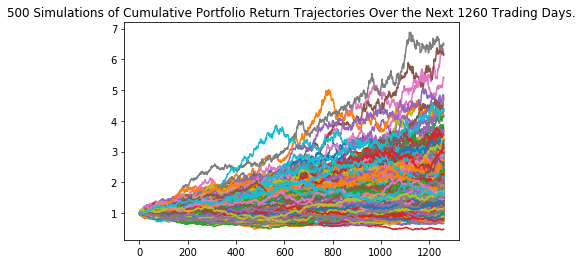

In [29]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_dist_5_lines=mc_dist_5.plot_simulation()

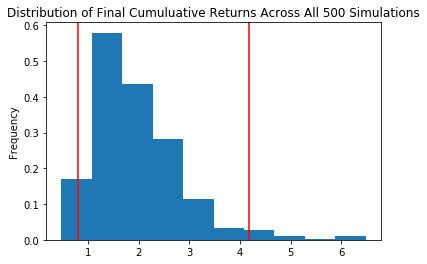

In [30]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
mc_dist_5_lines=mc_dist_5.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five=mc_dist_5.summarize_cumulative_return()
# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.952058
std               0.848884
min               0.476998
25%               1.391692
50%               1.781945
75%               2.365015
max               6.480547
95% CI Lower      0.812411
95% CI Upper      4.171505
Name: 1260, dtype: float64


In [32]:
# Set initial investment
# YOUR CODE HERE!
initial_investment=235000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_upper_five=round(tbl_five[9]*initial_investment,2)
ci_lower_five=round(tbl_five[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $235000 in the portfolio over the next 5 years will end within in the range of $190916.56 and $980303.6


### *For the purpose of analysis - I am assuming maximum possible return. I understand that realistically, the client's invesmtent return would fall somewhere near the middle. We're assuming 1 million is needed for retirement. Additionally,values are approximate. Theoretically, values would change daily with closing prices * First I assessed different stock/bond mixes. Investing 60,000 at 95% bond and 5% stock with an investment of 60,000.00 led to a high return of 142,000.00. An investment 60,000 initial investment at 95% stock and 5% bond, returns returns a maxium of approximately 258,000. Once realizing the greater stock mixes yield higher returns, to reach a million in five years you would need a approximately 235,000.00 

### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_dist_10=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.5,.95],
    num_simulation=500,
    num_trading_days=252*10
)

mc_dist_10.portfolio_data.head()

AGG                                                        SPY  \
              open    high       low    close     volume daily_return    open   
2015-08-28  109.34  109.37  108.9300  109.001  4604866.0          NaN  198.50   
2015-08-31  109.28  109.37  108.9000  108.920  3866305.0    -0.000743  198.11   
2015-09-01  108.83  109.11  108.7700  109.010  3083045.0     0.000826  193.12   
2015-09-02  108.92  109.05  108.8100  108.900  3273302.0    -0.001009  194.65   
2015-09-03  109.06  109.12  108.8701  109.040  1676171.0     0.001286  196.26   

                                                             
               high     low   close     volume daily_return  
2015-08-28  199.835  197.92  199.28  111959716          NaN  
2015-08-31  199.125  197.01  197.60  108023599    -0.008430  
2015-09-01  194.770  190.73  191.61  173963880    -0.030314  
2015-09-02  195.460  192.42  195.46  120044919     0.020093  
2015-09-03  198.050  194.96  195.55  117191452     0.000460

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986655,1.004417,1.010511,1.000673,0.983013,1.010875,1.001973,1.017187,0.998410,0.999133,...,1.032155,0.983981,0.995844,1.015873,0.978544,1.006024,1.015902,0.999535,0.998514,0.993866
2,0.973615,0.975131,1.001575,0.987941,0.981885,1.022155,1.001905,1.023495,0.992814,0.999999,...,1.040076,0.998088,0.995103,1.017180,1.007078,1.021189,0.988950,0.990337,0.991758,1.023271
3,0.965175,0.989202,0.999767,1.004141,0.964019,1.019150,0.985455,1.013557,0.992372,1.014741,...,1.027983,1.007687,0.990529,1.006215,1.022824,0.999936,0.994920,0.986508,0.973081,1.038905
4,0.968717,0.979537,0.990109,0.996656,0.960035,1.026795,0.989335,1.007393,1.000896,0.995658,...,1.051571,0.995425,0.981506,0.988906,1.047573,0.996180,1.014936,0.952593,0.991830,1.045959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.845245,2.505067,6.741928,2.070356,1.663171,3.357901,1.621252,5.443755,2.910497,3.385999,...,2.547055,8.259413,2.736622,1.682758,3.349184,1.238390,3.433039,3.615964,2.286359,3.487463
2517,0.830086,2.493794,6.667856,2.069822,1.665367,3.368231,1.610791,5.417343,2.974881,3.360384,...,2.532176,8.169554,2.764433,1.718693,3.321103,1.254005,3.481184,3.574320,2.304441,3.437332
2518,0.840976,2.491521,6.530370,2.062632,1.662904,3.384885,1.593469,5.452481,2.982526,3.366441,...,2.530804,8.260013,2.761620,1.727336,3.334492,1.262724,3.480311,3.593018,2.302144,3.425610
2519,0.843292,2.441873,6.747296,2.083103,1.666843,3.293965,1.610132,5.373901,3.050042,3.312647,...,2.441982,8.225381,2.793845,1.750612,3.312521,1.258498,3.506754,3.621808,2.284238,3.453775


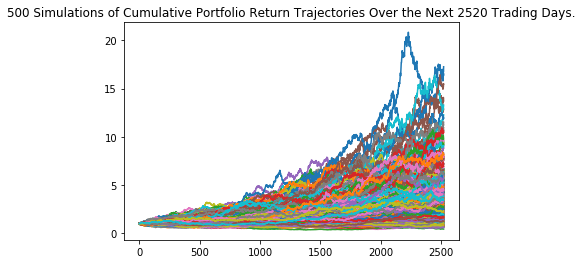

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_dist_10_lines=mc_dist_10.plot_simulation()

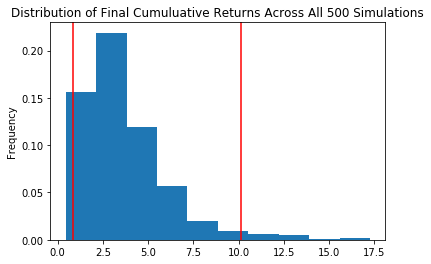

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
mc_dist_10_plot=mc_dist_10.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten=mc_dist_10.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten)

count           500.000000
mean              3.702299
std               2.431763
min               0.450605
25%               2.071218
50%               3.136662
75%               4.754710
max              17.265478
95% CI Lower      0.833727
95% CI Upper     10.144489
Name: 2520, dtype: float64


In [38]:
# Set initial investment
# YOUR CODE HERE!
initial_investment=95000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_upper_ten=round(tbl_ten[9]*initial_investment,2)
ci_lower_ten=round(tbl_ten[8]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $95000 in the portfolio over the next 10 years will end within in the range of $79204.03 and $963726.49


### In the 10 year scenario, an initial investment of 60,000.00 with an equity/bond mix of 5/95 yields a maximum of approximately 245,000. In a scenario of 95/5, the max reaches 662,000. Again, the higher stock mix yields higher returns. To reach a possible maximum of 1 million would require an initial investment of approximately 95,000.00